In [2]:
import warnings  # Hide all warnings here
warnings.filterwarnings("ignore")
import mne
mne.utils.set_log_level('error')
import numpy as np
import local
from models.preprocessing import utils
from joblib import Parallel,delayed

In [3]:
d = "../../data/reinhartlab/multimodal/"
#d = "G:\\Frederik\\data\\reinhartlab\\multimodal\\"
ext_in = "-epo.fif.gz"
ext_out = "ggggg-epo.fif.gz"
box = utils.select_dataset(d,ext_in,ext_out,show_all=False); box

In [6]:
files = [d+f+ext_in for f in utils.get_selection(box)]

In [9]:
epochs = mne.read_epochs(files[0])

In [11]:
epochs.plot_psd(fmin=2.,fmax=60.)

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [14]:
psdplt = Out[11]

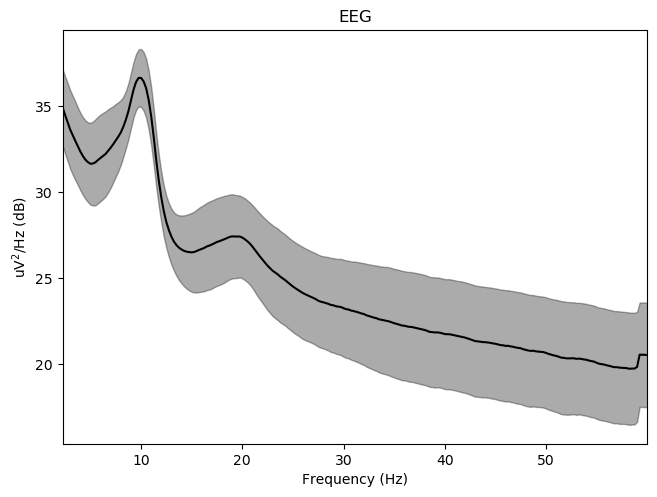

In [15]:
psdplt

In [33]:
ep_vis_corr = epochs['visual']['Correctness > 0']
ep_vis_err = epochs['visual']['Correctness < 0']
ep_aud_corr = epochs['audio']['Correctness > 0']
ep_aud_err = epochs['audio']['Correctness < 0']

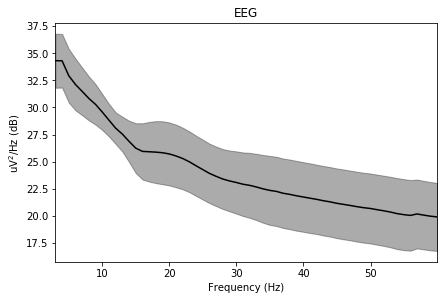

In [30]:
ep_vis_corr.apply_baseline((-.2,0.)).plot_psd(fmin=2.,fmax=60.,tmin=0.,tmax=1.);

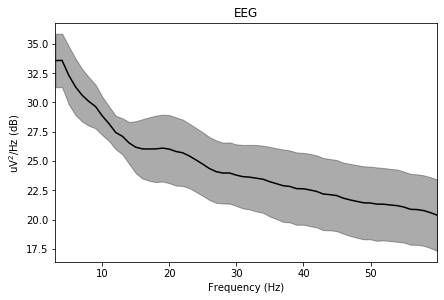

In [29]:
ep_vis_err.apply_baseline((-.2,0.)).plot_psd(fmin=2.,fmax=60.,tmin=0.,tmax=1.);

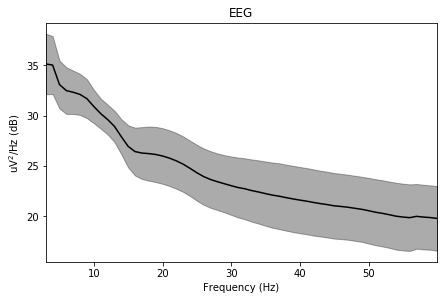

In [34]:
ep_aud_corr.apply_baseline((-.2,0.)).plot_psd(fmin=2.,fmax=60.,tmin=0.,tmax=1.);

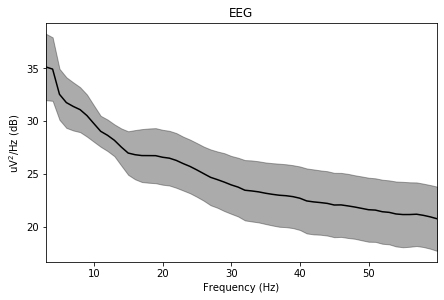

In [37]:
fig = ep_aud_err.apply_baseline((-.2,0.)).plot_psd(fmin=2.,fmax=60.,tmin=0.,tmax=1.,show=False);
fig.vi

In [56]:
# tfr_vis_corr = mne.time_frequency.tfr_morlet(ep_vis_corr,[3,4,5,7,9,11,13,15,18,21,25,30,35,40,45,50,60,70,80,90],5)
tfr_vis_err = mne.time_frequency.tfr_morlet(ep_vis_err,[3,4,5,7,9,11,13,15,18,21,25,30,35,40,45,50,60,70,80,90],5)
tfr_aud_corr = mne.time_frequency.tfr_morlet(ep_aud_corr,[3,4,5,7,9,11,13,15,18,21,25,30,35,40,45,50,60,70,80,90],5)
tfr_aud_err = mne.time_frequency.tfr_morlet(ep_aud_err,[3,4,5,7,9,11,13,15,18,21,25,30,35,40,45,50,60,70,80,90],5)

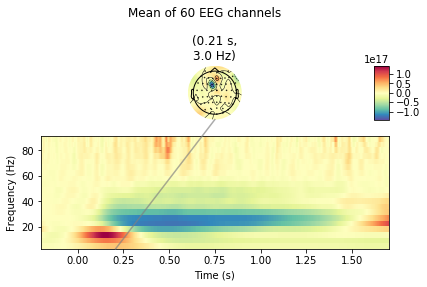

In [101]:
fig = tfr_vis_corr[0].copy().crop(-.2,1.7).plot_joint(baseline=(-.2,0),mode='percent',cmap='Spectral_r',show=False);

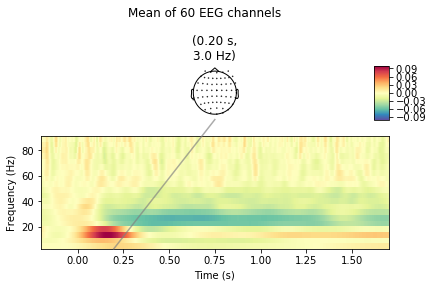

In [97]:
tfr_vis_err[0].copy().crop(-.2,1.7).plot_joint(baseline=(-.2,0),mode='percent',cmap='Spectral_r');

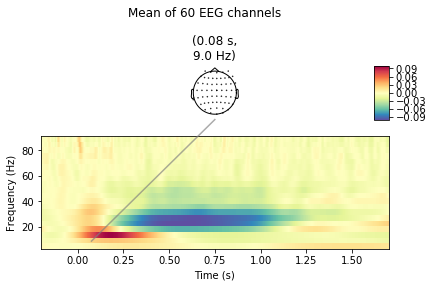

In [98]:
tfr_aud_corr[0].copy().crop(-.2,1.7).plot_joint(baseline=(-.2,0),mode='percent',cmap='Spectral_r');

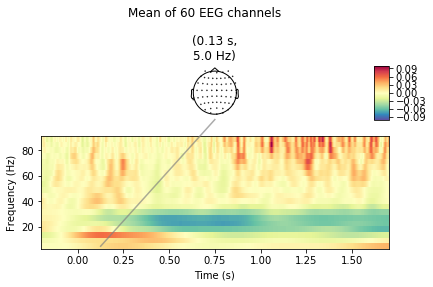

In [99]:
tfr_aud_err[0].copy().crop(-.2,1.7).plot_joint(baseline=(-.2,0),mode='percent',cmap='Spectral_r');

In [104]:
fig.get_axes()[0]